In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import random
import os

def set_seeds(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.config.experimental.enable_op_determinism()

set_seeds(42)

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv('/content/drive/MyDrive/ШНМ/housing.csv', header=None, names=column_names, delim_whitespace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
print(df.shape)

(506, 14)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df['MEDV'].describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.duplicated().sum()

0

# Data preparation

In [ ]:
X= df.drop('MEDV', axis= 1)
y=df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=121)

In [ ]:
scaler= StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
model= Sequential()
model.add(Dense(32, input_dim=13, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
monitor= EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history= model.fit(X_train, y_train, epochs=100, validation_split=0.16, callbacks=[monitor])

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 22.0224 - val_loss: 19.8914
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.1459 - val_loss: 16.6243
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.4491 - val_loss: 12.7607
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.3345 - val_loss: 8.5805
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3761 - val_loss: 6.3002
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9066 - val_loss: 4.9257
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.0932 - val_loss: 4.0995
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8894 - val_loss: 3.9481
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4056 - val_loss: 4.0010
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0671 - val_loss: 3.7387
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9368 - val_loss: 3.4332
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - l

In [ ]:
def plot_epochs_accuracy(history):
  sns.lineplot(history.history['loss'], label='loss')
  sns.lineplot(history.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()

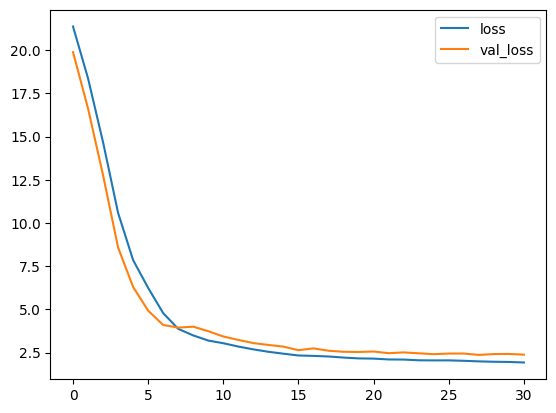

In [ ]:
plot_epochs_accuracy(history)

In [ ]:
y_pred= model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
mse_score= mean_squared_error(y_test, y_pred)
print(mse_score)

14.351364171694327


In [ ]:
loss= model.evaluate(X_test, y_test)
print(loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4239 
2.366123914718628


# Task2: Compare the performance of different gradient descent optimisers

In [ ]:
def create_model(optimizer='adam', learning_rate=0.001):
    if optimizer == 'sgd':
        optimizer_instance = SGD(learning_rate=learning_rate)
    elif optimizer == 'adam':
        optimizer_instance = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer_instance = RMSprop(learning_rate=learning_rate)
    else:
        optimizer_instance = optimizer

    model = Sequential()
    model.add(Dense(32, input_dim=13, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer=optimizer_instance, loss='mean_absolute_error')
    return model

In [ ]:
optimizers = ['sgd', 'adam', 'rmsprop']
results = {}
best_mae = float('inf')
best_model = None
best_optimizer = None
best_history = None

for optimizer in optimizers:
    model = create_model(optimizer=optimizer, learning_rate=0.01)
    history = model.fit(X_train, y_train, epochs=100, validation_split=0.16, batch_size=32, verbose=0)
    mae = model.evaluate(X_test, y_test, verbose=0)
    results[optimizer] = mae

    y_pred = model.predict(X_test)
    mse= mean_squared_error(y_test, y_pred)
    r2= r2_score(y_test, y_pred)
    print(f'\t Optimizer: {optimizer}')
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2: {r2:.4f}")

    if mae < best_mae:
        best_mae = mae
        best_model = model
        best_optimizer = optimizer
        best_history = history

print(f"\nBest optimizer: {best_optimizer} with MAE: {best_mae:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
	 Optimizer: sgd
MSE: 15.0919
MAE: 2.3688
R2: 0.7969
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
	 Optimizer: adam
MSE: 12.4633
MAE: 2.3165
R2: 0.8323
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
	 Optimizer: rmsprop
MSE: 14.3317
MAE: 2.4257
R2: 0.8071

Best optimizer: adam with MAE: 2.3165


In [ ]:
mae_best= best_model.evaluate(X_test, y_test)
print(mae_best)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3672 
2.3164706230163574


In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = best_model.predict(X_test)

mse_train = mean_squared_error(y_test, y_train_pred)
mae_train = mean_absolute_error(y_test, y_train_pred)
r2_train = r2_score(y_test, y_train_pred)

print(f"Training Data Metrics:")
print(f"MSE: {mse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"R²: {r2_train:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training Data Metrics:
MSE: 12.4633
MAE: 2.3165
R²: 0.8323


#  Tasks 3: Apply regularisation methods

In [ ]:
model_l1= Sequential()
model_l1.add(Dense(32, input_dim=13, activation='relu', kernel_regularizer=regularizers.l1))
model_l1.add(Dense(1))

model_l1.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error')
monitor_l1= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_l1= model_l1.fit(X_train, y_train, epochs=100, validation_split=0.16, callbacks=[monitor_l1])

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 21.6158 - val_loss: 18.7978
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 17.8211 - val_loss: 14.5126
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.1036 - val_loss: 10.4635
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.9597 - val_loss: 8.2099
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.4821 - val_loss: 6.4676
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.2380 - val_loss: 5.2942
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.8677 - val_loss: 5.2367
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4160 - val_loss: 5.0478
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 4.1454 - val_loss: 4.8328
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.9387 - val_loss: 4.5377
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8095 - val_loss: 4.4338
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/

In [ ]:
model_l1.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                     │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 964 (3.77 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 483 (1.89 KB)

In [ ]:
model_l2= Sequential()
model_l2.add(Dense(32, input_dim=13, activation='relu', kernel_regularizer=regularizers.l2))
model_l2.add(Dense(1))

model_l2.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error')
monitor_l2= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_l2=model_l2.fit(X_train, y_train, epochs=100, validation_split=0.16, callbacks=[monitor_l2])

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 22.2345 - val_loss: 19.8585
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.9805 - val_loss: 15.8675
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.6208 - val_loss: 11.0881
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.0324 - val_loss: 7.8795
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1981 - val_loss: 6.3053
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3205 - val_loss: 4.9210
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6728 - val_loss: 4.5498
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0149 - val_loss: 4.5437
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7586 - val_loss: 4.4355
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6150 - val_loss: 4.1580
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4682 - val_loss: 4.0557
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - l

In [ ]:
model_dr= Sequential()
model_dr.add(Dense(32, input_dim=13, activation='relu'))
model_dr.add(Dropout(0.1))
model_dr.add(Dense(1))

model_dr.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error')
monitor_dr= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_dr= model_dr.fit(X_train, y_train, epochs=100, validation_split=0.16, callbacks=[monitor_dr])

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 22.1181 - val_loss: 19.9555
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.1656 - val_loss: 16.4206
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.2937 - val_loss: 12.0935
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.6979 - val_loss: 8.2076
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3351 - val_loss: 6.2915
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0740 - val_loss: 4.9435
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2691 - val_loss: 4.0925
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.3446 - val_loss: 3.9261
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8656 - val_loss: 3.7923
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8071 - val_loss: 3.7363
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2879 - val_loss: 3.6841
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - l

# Task 4:Create and evaluate learning curves

In [ ]:
def plot_learning_curves(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Learning Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
histories = [best_history, history_l1, history_l2, history_dr]
titles = ['Best Model', 'L1 Regularization', 'L2 Regularization', 'Dropout']

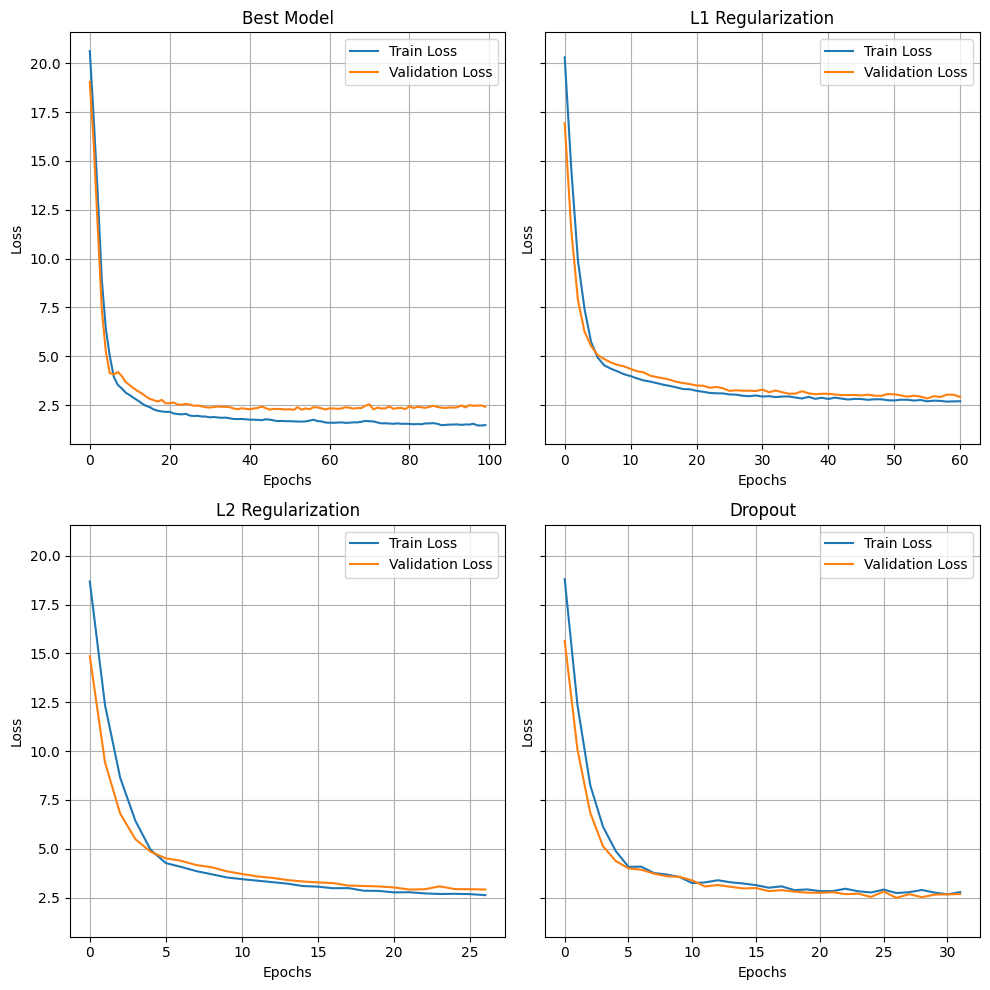

In [ ]:
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharey=True)

for i, (history, title) in enumerate(zip(histories, titles)):
    row = i // 2
    col = i % 2
    axes[row,col].plot(histories[i].history['loss'], label='Train Loss')
    axes[row,col].plot(histories[i].history['val_loss'], label='Validation Loss')

    axes[row, col].set_title(title)
    axes[row, col].set_xlabel('Epochs')
    axes[row, col].set_ylabel('Loss')
    axes[row, col].legend()
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()